## Import TensorFlow and other libraries

In [79]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import tensorflow as tf
from random import randrange
from PIL import Image
import random
import matplotlib.animation as animation
import matplotlib.image as mpimg

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras import activations
from tensorflow.keras import initializers
import os

In [81]:
from matplotlib.animation import FuncAnimation
from IPython import display
import keras_tuner as kt
from tensorflow.keras import backend as K
import matplotlib.animation as animation

In [63]:
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
tf.config.set_visible_devices([], 'GPU')

## Load the dataset
To start, you will train the basic autoencoder using the Fashion MNIST dataset. Each image in this dataset is 28x28 pixels. 

In [4]:
#Fonction qui transforme un nombre en string écrit en 4 chiffres pour lire les noms des fichiers

def format_number(num, digits):
    return str(num).zfill(digits)

In [17]:
format_number(x,4)

'0001'

In [5]:
#Generation de la base de données et concaténation.

nom_fichier="hydro"
n=1000
size=128
Bdd_train=[]
prediction_train=[]

Bdd_test=[]
prediction_test=[]
k=0
Nombre_images_voulues=5000
Nombre_fichiers=int(n/57)
indice_train=int(Nombre_fichiers*0.8)
indice_test=n


for i in range(0,3):
    folder=i
    image1=Image.open("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(1,4)+".gif")
    Bdd_train.append(np.concatenate((image1,image2),axis=1))
    
    image1=Image.open("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(2,4)+".gif")
    image2=Image.open("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(3,4)+".gif")
    Bdd_train.append(np.concatenate((image1,image2),axis=1))
    
    for j in range(3,999):
        image1=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(j,4)+".gif")
        image2=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(j+1,4)+".gif")
        Bdd_train.append(np.concatenate((image1,image2),axis=1))
        prediction_train.append(Bdd_train[len(Bdd_train)-1])
         
    image1=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(999,4)+".gif")
    image2=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(1000,4)+".gif")
    prediction_train.append(np.concatenate((image1,image2),axis=1))   
    image1=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(1000,4)+".gif")
    image2=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(1001,4)+".gif")
    prediction_train.append(np.concatenate((image1,image2),axis=1))

print("train fait")
  
k=0

for i in range(2,3):
    folder=i
    image1=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(1,4)+".gif")
    image2=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(2,4)+".gif")
    Bdd_test.append(np.concatenate((image1,image2),axis=1))
    
    image1=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(2,4)+".gif")
    image2=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(3,4)+".gif")
    Bdd_test.append(np.concatenate((image1,image2),axis=1))
    
    for j in range(3,999):
        image1=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(j,4)+".gif")
        image2=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(j+1,4)+".gif")
        Bdd_test.append(np.concatenate((image1,image2),axis=1))
        prediction_test.append(Bdd_test[len(Bdd_test)-1])
         
    image1=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(999,4)+".gif")
    image2=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(1000,4)+".gif")
    prediction_test.append(np.concatenate((image1,image2),axis=1))   
    image1=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(1000,4)+".gif")
    image2=plt.imread("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(1001,4)+".gif")
    prediction_test.append(np.concatenate((image1,image2),axis=1))

print("test fait")     
k=0





train fait
test fait


In [5]:
#Generation de la base de données SANS CONCATENATION
nom_fichier="hydro"
n=1000
size=128
Bdd_train=[]
prediction_train=[]

Bdd_test=[]
prediction_test=[]
k=0
Nombre_images_voulues=5000
Nombre_fichiers=int(n/57)
indice_train=int(Nombre_fichiers*0.8)
indice_test=n


for i in range(0,3):
    folder=i
    image1=Image.open("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(1,4)+".gif").convert('RGB')
    image1=image1.resize((128,128),Image.ANTIALIAS)
    image1=np.array(image1)
    Bdd_train.append(image1)
    
    
    for j in range(2,1001):
        image1=Image.open("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(j,4)+".gif").convert('RGB')
        image1=image1.resize((128,128),Image.ANTIALIAS)
        image1=np.array(image1)
        Bdd_train.append(image1)
        prediction_train.append(Bdd_train[len(Bdd_train)-1])
         
    image1=Image.open("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(1001,4)+".gif").convert('RGB')
    image1=image1.resize((128,128),Image.ANTIALIAS)
    image1=np.array(image1)
    prediction_train.append(image1)

print("train fait")
  
k=0





/tmp/ipykernel_1130458/3094990193.py:19: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image1=image1.resize((128,128),Image.ANTIALIAS)
/tmp/ipykernel_1130458/3094990193.py:26: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image1=image1.resize((128,128),Image.ANTIALIAS)
/tmp/ipykernel_1130458/3094990193.py:32: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image1=image1.resize((128,128),Image.ANTIALIAS)


train fait


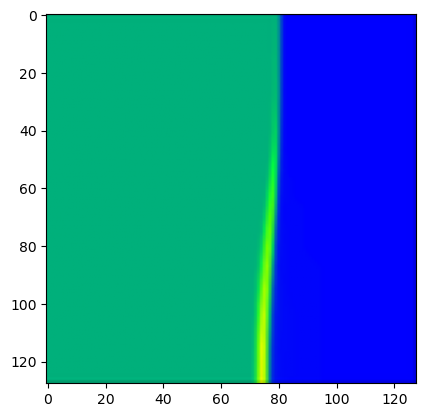

In [11]:
plt.imshow(Bdd_train[1200])

In [6]:
Bdd_train=np.array(Bdd_train)

prediction_train=np.array(prediction_train)


In [7]:
Bdd_train=Bdd_train / 255
prediction_train=prediction_train / 255

In [8]:
Bdd_train, Bdd_test,prediction_train, prediction_test = train_test_split(Bdd_train,prediction_train ,
                                   random_state=104, 
                                   test_size=0.2, 
                                   shuffle=True)

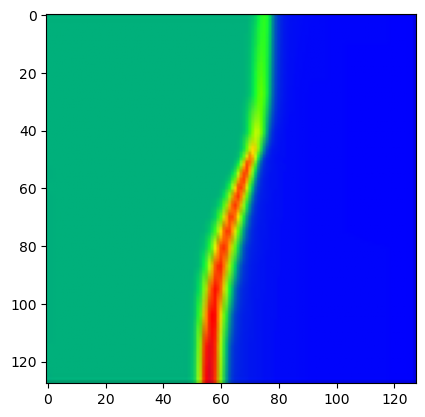

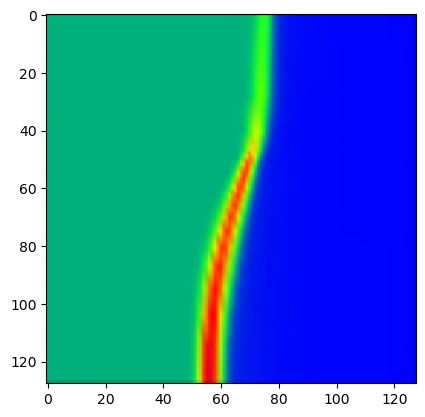

(2400, 128, 128, 3)
(600, 128, 128, 3)


In [12]:
plt.imshow(Bdd_test[298])
plt.show()
plt.close()
plt.imshow(prediction_test[298])
plt.show()
plt.close()
print(Bdd_train.shape)
print(Bdd_test.shape)

In [13]:
prediction_test.shape

(600, 128, 128, 3)

In [8]:
del prediction_test
del prediction_train

## Encoder Decoder



Définition de fonction pour créer le modèle (papier)

In [14]:
def deconv_sigmoid(outch,kernel_size,stride=1,padding='same'):
    convlayer = tf.keras.Sequential([
        tf.keras.layers.Conv2DTranspose(outch, kernel_size=kernel_size,  activation='sigmoid', padding='same',strides=stride),
    
    ])
    return convlayer

def deconv_relu(outch,kernel_size,stride=1,padding=1):
    convlayer = tf.keras.Sequential([
        tf.keras.layers.Conv2DTranspose(outch, kernel_size=kernel_size,  padding='same',strides=stride),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),

    ])
    return convlayer



Modèle (Papier)

In [15]:


#CONSTRUCTION DU MODELE DE DÉCODAGE
deconv_8 = deconv_relu(64,(3,3),stride=(1,1))
deconv_7 = deconv_relu(32,4,stride=2)
deconv_6 = deconv_relu(16,4,stride=2)
deconv_5 = deconv_relu(8,4,stride=2)
deconv_4 = deconv_relu(8,4,stride=2)
deconv_3 = deconv_relu(4,4,stride=2)
deconv_2 = deconv_relu(4,4,stride=2)
deconv_1 = deconv_sigmoid(3,4,stride=2)

predict_8 = tf.keras.layers.Conv2D(3,3,strides=1,padding='same')
predict_7 = tf.keras.layers.Conv2D(3,3,strides=1,padding='same')
predict_6 = tf.keras.layers.Conv2D(3,3,strides=1,padding='same')
predict_5 = tf.keras.layers.Conv2D(3,3,strides=1,padding='same')
predict_4 = tf.keras.layers.Conv2D(3,3,strides=1,padding='same')
predict_3 = tf.keras.layers.Conv2D(3,3,strides=1,padding='same')
predict_2 = tf.keras.layers.Conv2D(3,3,strides=1,padding='same')

up_sample_8 = tf.keras.Sequential([      
    tf.keras.layers.Conv2DTranspose(3, kernel_size=(3, 3), activation='sigmoid', padding='same',strides=(1,1),use_bias=False),         
    ])

up_sample_7 =tf.keras.Sequential([     
    tf.keras.layers.Conv2DTranspose(3, kernel_size=(4, 4), activation='sigmoid', padding='same',strides=2,use_bias=False),
    ])

up_sample_6 = tf.keras.Sequential([           
    tf.keras.layers.Conv2DTranspose(3, kernel_size=(4, 4), activation='sigmoid', padding='same',strides=2,use_bias=False),
     ])

up_sample_5 = tf.keras.Sequential([           
    tf.keras.layers.Conv2DTranspose(3, kernel_size=(4, 4), activation='sigmoid', padding='same',strides=2,use_bias=False),
     ])

up_sample_4 = tf.keras.Sequential([        
    tf.keras.layers.Conv2DTranspose(3, kernel_size=(4, 4), activation='sigmoid', padding='same',strides=2,use_bias=False),
    ])

up_sample_3 = tf.keras.Sequential([         
    tf.keras.layers.Conv2DTranspose(3, kernel_size=(4, 4), activation='sigmoid', padding='same',strides=2,use_bias=False),
     ])

up_sample_2 = tf.keras.Sequential([     
    tf.keras.layers.Conv2DTranspose(3, kernel_size=(4, 4), activation='sigmoid', padding='same',strides=2,use_bias=False),
     ])



def minigooglenet_functional(width, height, depth, classes):
    inputShape=(height,width,depth)
    chanDim=-1
    inputs=tf.keras.layers.Input(shape=inputShape)

    deconv8_out = deconv_8(inputs)
    predict_8_out = up_sample_8(predict_8(inputs))
    x = tf.keras.layers.Concatenate(axis=3)([deconv8_out, predict_8_out])

    deconv7_out = deconv_7(x)
    predict_7_out = up_sample_7(predict_7(x))
    x = tf.keras.layers.Concatenate(axis=3)([deconv7_out, predict_7_out])


    deconv6_out = deconv_6(x)
    predict_6_out = up_sample_6(predict_6(x))
    x = tf.keras.layers.Concatenate(axis=3)([deconv6_out, predict_6_out])

    deconv5_out = deconv_5(x)
    predict_5_out = up_sample_5(predict_5(x))
    x = tf.keras.layers.Concatenate(axis=3)([deconv5_out, predict_5_out])
    
    deconv4_out = deconv_4(x)
    predict_4_out = up_sample_4(predict_4(x))
    x = tf.keras.layers.Concatenate(axis=3)([deconv4_out, predict_4_out])
    
    deconv3_out = deconv_3(x)
    predict_3_out = up_sample_6(predict_3(x))
    x = tf.keras.layers.Concatenate(axis=3)([deconv3_out, predict_3_out])
    
    deconv2_out = deconv_2(x)
    predict_2_out = up_sample_2(predict_2(x))
    x = tf.keras.layers.Concatenate(axis=3)([deconv2_out, predict_2_out]) 
    
    
    x = deconv_1(x)
    


    model=Model(inputs,x,name="Test")
    return model



2023-07-28 11:49:20.049721: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-28 11:49:20.052915: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-07-28 11:49:20.052970: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1261] Device interconnect StreamExecutor with strength 1 edge matrix:
2023-07-28 11:49:20.052978: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1267]      


In [16]:
latent_dim =64
p_x=128
p_y=128

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(p_x, p_y, 3)),
        
        tf.keras.layers.Conv2D(4, (4, 4), padding='same', strides=2),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        tf.keras.layers.Conv2D(4, (3, 3), padding='same', strides=1),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        
        
        
        tf.keras.layers.Conv2D(4, (4, 4), padding='same', strides=2),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        tf.keras.layers.Conv2D(4, (3, 3), padding='same', strides=1),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        
        
        
        tf.keras.layers.Conv2D(4, (4, 4), padding='same', strides=2),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        tf.keras.layers.Conv2D(4, (3, 3), padding='same', strides=1),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        
        
        
        tf.keras.layers.Conv2D(8, (4, 4), padding='same', strides=2),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        tf.keras.layers.Conv2D(8, (3, 3), padding='same', strides=1),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        
        
        
        tf.keras.layers.Conv2D(8, (4, 4), padding='same', strides=2),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        tf.keras.layers.Conv2D(8, (3, 3), padding='same', strides=1),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        
        
        
        tf.keras.layers.Conv2D(16, (4, 4), padding='same', strides=2),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        tf.keras.layers.Conv2D(16, (3, 3), padding='same', strides=1),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        
        
        
        tf.keras.layers.Conv2D(32, (4, 4), padding='same', strides=2),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        tf.keras.layers.Conv2D(32, (3, 3), padding='same', strides=1),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        
        
         tf.keras.layers.Conv2D(64, (3, 3), padding='same', strides=(1,1)),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),
        tf.keras.layers.Conv2D(64, (3, 3), padding='same', strides=1),
        layers.BatchNormalization(),
        layers.Activation(activations.relu),

    ])
   
    self.decoder = minigooglenet_functional(1, 1, 64, 3)

     
        
        
        
    
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded
  
autoencoder = Autoencoder(latent_dim) 

In [17]:
autoencoder.encoder.summary()
autoencoder.decoder.summary()


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 64, 64, 4)         196       
_________________________________________________________________
batch_normalization_7 (Batch (None, 64, 64, 4)         16        
_________________________________________________________________
activation_7 (Activation)    (None, 64, 64, 4)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 4)         148       
_________________________________________________________________
batch_normalization_8 (Batch (None, 64, 64, 4)         16        
_________________________________________________________________
activation_8 (Activation)    (None, 64, 64, 4)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 4)       

In [19]:
#chargement modele
autoencoder=tf.keras.models.load_model("../Modele/Hydro_couleur_one_input")

In [30]:
epoch=1000 #epoch pour l'entrainement
epoc=-1 #compteur globale de l'epoc pour le calcul de Error
limite=int(len(Bdd_test)/10)   #Le nombre d'elements de données test dont on va mesure l'erreur
Error=[[0 for i in range(0,limite)] for i in range(0,epoch)] #Tableau d'erreur

#Tentative de définition d'une nouvelle erreur via les CallBack

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=5, min_lr=0.001)

train_size=len(Bdd_train)
batch_size=128
initial_learning_rate = 0.001
final_learning_rate = 0.00006
learning_rate_decay_factor = (final_learning_rate / initial_learning_rate)**(1/epoch)
steps_per_epoch = int(train_size/batch_size)

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate=initial_learning_rate,
                decay_steps=steps_per_epoch,
                decay_rate=learning_rate_decay_factor,
                staircase=True)


optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)   
autoencoder.compile(optimizer=optimizer, loss=losses.MeanSquaredError())

#Execution de l'entrainement
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

history=autoencoder.fit(Bdd_train, prediction_train,batch_size=batch_size,
                epochs=epoch,
                shuffle=True,
                validation_data=(Bdd_test, prediction_test), callbacks=[callback],
              )

2023-07-27 17:22:03.703468: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-07-27 17:22:03.723034: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2300000000 Hz


Epoch 1/1000
19/19 [==============================] - 14s 527ms/step - loss: 0.1497 - val_loss: 0.1415
Epoch 2/1000
19/19 [==============================] - 8s 411ms/step - loss: 0.1192 - val_loss: 0.1231
Epoch 3/1000
19/19 [==============================] - 7s 396ms/step - loss: 0.0921 - val_loss: 0.1103
Epoch 4/1000
19/19 [==============================] - 7s 391ms/step - loss: 0.0698 - val_loss: 0.1028
Epoch 5/1000
19/19 [==============================] - 7s 380ms/step - loss: 0.0543 - val_loss: 0.1010
Epoch 6/1000
19/19 [==============================] - 7s 357ms/step - loss: 0.0436 - val_loss: 0.1009
Epoch 7/1000
19/19 [==============================] - 7s 360ms/step - loss: 0.0355 - val_loss: 0.1004
Epoch 8/1000
19/19 [==============================] - 7s 365ms/step - loss: 0.0292 - val_loss: 0.0958
Epoch 9/1000
19/19 [==============================] - 7s 366ms/step - loss: 0.0247 - val_loss: 0.0884
Epoch 10/1000
19/19 [==============================] - 7s 369ms/step - loss: 0.02

In [143]:
autoencoder.save("../Modele/Hydro")

2023-07-26 19:49:25.719133: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ../Modele/Hydro/assets


In [20]:
print("Evaluate on test data")
results = autoencoder.evaluate(Bdd_test, prediction_test, batch_size=128)
print("test loss, test acc:", results)


Evaluate on test data


2023-07-27 10:28:57.271247: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-07-27 10:28:57.290893: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2300000000 Hz


5/5 [==============================] - 1s 85ms/step - loss: 0.0029
test loss, test acc: 0.0029225540347397327


In [32]:
encoded_imgs = autoencoder.encoder(Bdd_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()


In [62]:
Bdd_train.shape

(1996, 128, 256, 1)

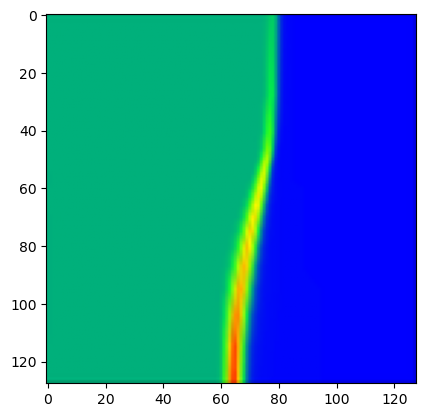

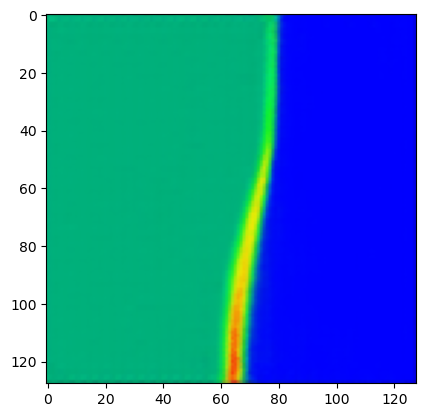

In [34]:
n=107
plt.imshow(Bdd_test[n])
plt.show()
plt.close()
plt.imshow(decoded_imgs[n])
plt.show()
plt.close()

# LEVINA BICKEL ALGORITHM

In [35]:
from sklearn.neighbors import NearestNeighbors

def intrinsic_dim_sample_wise(X, k=5):
    neighb = NearestNeighbors(n_neighbors=k + 1).fit(X)
    dist, ind = neighb.kneighbors(X)
    dist = dist[:, 1:]
    dist = dist[:, 0:k]
    assert dist.shape == (X.shape[0], k)
    assert np.all(dist > 0)
    d = np.log(dist[:, k - 1: k] / dist[:, 0:k-1])
    d = d.sum(axis=1) / (k - 2)
    d = 1. / d
    intdim_sample = d
    return intdim_sample

def intrinsic_dim_scale_interval(X, k1=10, k2=20):
    X = pd.DataFrame(X).drop_duplicates().values # remove duplicates in case you use bootstrapping
    intdim_k = []
    for k in range(k1, k2 + 1):
        m = intrinsic_dim_sample_wise(X, k).mean()
        intdim_k.append(m)
    return intdim_k


In [36]:
encoded_imgs = autoencoder.encoder(np.concatenate((Bdd_train,Bdd_test))).numpy()
bis=encoded_imgs.reshape(len(Bdd_train)+len(Bdd_test),64)
print(encoded_imgs.shape)
dim = intrinsic_dim_scale_interval(bis,k1=5,k2=100)
print(np.array(dim).mean())

(3000, 1, 1, 64)
1.4969132985932943


## DEUXIEME AUTO ENCODEUR

### On rajoute le reste des images

In [20]:
#fonction d'activation custom sur tensorflow (sinus)
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Activation
from tensorflow.keras.utils import get_custom_objects

def custom_activation(x):
  
    return (tf.math.sin(30*x))
     
get_custom_objects().update({'custom_activation': Activation(custom_activation)})


In [15]:
#entrainement_2=autoencoder.encoder(np.concatenate((Bdd_train,Bdd_supp))).numpy()

Bdd_train=autoencoder.encoder(Bdd_train).numpy()




2023-05-24 17:23:12.882107: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 9413591040 exceeds 10% of free system memory.
2023-05-24 17:23:23.807263: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 12551454720 exceeds 10% of free system memory.


: 

: 

In [21]:
encoded_imgs = autoencoder.encoder(np.concatenate((Bdd_train,Bdd_test))).numpy()

Bdd_train_2, Bdd_test_2 = train_test_split(encoded_imgs,
                                   random_state=104, 
                                   test_size=0.2, 
                                   shuffle=True)

In [22]:
#Variables pour initialiser les poids

b=1/float(64)
b0=math.sqrt(6/(64))/30
b1=math.sqrt(6/(128))/30
b2=math.sqrt(6/(64))/30
b3=math.sqrt(6/(32))/30
b4=math.sqrt(6/(4))/30
#kernel_initializer=tf.keras.initializers.RandomUniform(minval=b, maxval=-b)


In [23]:
#Auto encodeur 2 avec latent_dim_2 le resultat approché de LB
latent_dim_2 = 2

class Autoencoder_2(Model):
  def __init__(self, latent_dim_2):
    super(Autoencoder_2, self).__init__()
    self.latent_dim_2 = latent_dim_2
    self.encoder_2 = tf.keras.Sequential([ 
    layers.Dense(64,activation='custom_activation',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b, maxval=b, seed=None),bias_initializer=initializers.Zeros()),
    layers.Dense(32,activation='custom_activation',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b1, maxval=b1, seed=None),bias_initializer=initializers.Zeros()),
    layers.Dense(16,activation='custom_activation',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b2, maxval=b2, seed=None),bias_initializer=initializers.Zeros()),
    layers.Dense(latent_dim_2,activation='custom_activation',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b3, maxval=b3, seed=None),bias_initializer=initializers.Zeros()),
    ])
    self.decoder_2 = tf.keras.Sequential([
        layers.Dense(16,activation='custom_activation',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b4, maxval=b4, seed=None),bias_initializer=initializers.Zeros()),
        layers.Dense(32,activation='custom_activation',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b3, maxval=b3, seed=None),bias_initializer=initializers.Zeros()), 
        layers.Dense(64,activation='custom_activation',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b2, maxval=b2, seed=None),bias_initializer=initializers.Zeros()),
        layers.Dense(64,activation='relu',kernel_initializer=tf.keras.initializers.RandomUniform(minval=-b1, maxval=b1, seed=None),bias_initializer=initializers.Zeros()),
    ])
  def call(self, x):
    encoded = self.encoder_2(x)
    decoded = self.decoder_2(encoded)
    return decoded
  
  
autoencoder_2 = Autoencoder_2(latent_dim_2) 


In [26]:

epoch=1000 #epoch pour l'entrainement

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=5, min_lr=0.001)


train_size=len(Bdd_train_2)
batch_size=128
#Tentative de définition d'une nouvelle erreur via les CallBack

initial_learning_rate = 0.0000015
final_learning_rate = 0.0000005
learning_rate_decay_factor = (final_learning_rate / initial_learning_rate)**(1/epoch)
steps_per_epoch = int(train_size/batch_size)

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
                initial_learning_rate=initial_learning_rate,
                decay_steps=steps_per_epoch,
                decay_rate=learning_rate_decay_factor,
                staircase=True)

log_dir = "logs/fit/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)   
    
autoencoder_2.compile(optimizer, loss=losses.MeanSquaredError())

#Execution de l'entrainement
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

history2=autoencoder_2.fit(Bdd_train_2,Bdd_train_2,batch_size=batch_size,
                epochs=epoch,
                shuffle=True,
                validation_data=(Bdd_test_2, Bdd_test_2), callbacks=[callback,tensorboard_callback],
            )
              


2023-07-28 11:53:55.570479: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-07-28 11:53:55.570531: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-07-28 11:53:55.572019: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-07-28 11:53:55.572220: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Epoch 1/1000
15/19 [======================>.......] - ETA: 0s - loss: 0.0037

2023-07-28 11:53:56.312504: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-07-28 11:53:56.312546: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-07-28 11:53:56.370768: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-07-28 11:53:56.370944: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-07-28 11:53:56.371671: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 0 callback api events and 0 activity events. 
2023-07-28 11:53:56.372763: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-07-28 11:53:56.374786: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: logs/fit/train/plugins/profile/2023_07_28_11_53_56
2023-07-28 11:53:56.376227: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped too

19/19 [==============================] - 1s 24ms/step - loss: 0.0036 - val_loss: 0.0062
Epoch 2/1000
19/19 [==============================] - 0s 7ms/step - loss: 0.0037 - val_loss: 0.0062
Epoch 3/1000
19/19 [==============================] - 0s 7ms/step - loss: 0.0035 - val_loss: 0.0062
Epoch 4/1000
19/19 [==============================] - 0s 7ms/step - loss: 0.0036 - val_loss: 0.0062
Epoch 5/1000
19/19 [==============================] - 0s 7ms/step - loss: 0.0033 - val_loss: 0.0062
Epoch 6/1000
19/19 [==============================] - 0s 7ms/step - loss: 0.0034 - val_loss: 0.0061
Epoch 7/1000
19/19 [==============================] - 0s 7ms/step - loss: 0.0035 - val_loss: 0.0062
Epoch 8/1000
19/19 [==============================] - 0s 7ms/step - loss: 0.0035 - val_loss: 0.0062
Epoch 9/1000
19/19 [==============================] - 0s 7ms/step - loss: 0.0034 - val_loss: 0.0061
Epoch 10/1000
19/19 [==============================] - 0s 7ms/step - loss: 0.0035 - val_loss: 0.0062
Epoch 11/10

In [91]:
autoencoder_2.save("../Modele/Hydro_unique_AE2")

2023-07-28 12:41:13.061376: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ../Modele/Hydro_unique_AE2/assets


INFO:tensorflow:Assets written to: ../Modele/Hydro_unique_AE2/assets


Model: "sequential_147"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1, 1, 128)         8320      
_________________________________________________________________
dense_9 (Dense)              (None, 1, 1, 64)          8256      
_________________________________________________________________
dense_10 (Dense)             (None, 1, 1, 32)          2080      
_________________________________________________________________
dense_11 (Dense)             (None, 1, 1, 2)           66        
Total params: 18,722
Trainable params: 18,722
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_148"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1, 1, 32)          96        
________________________

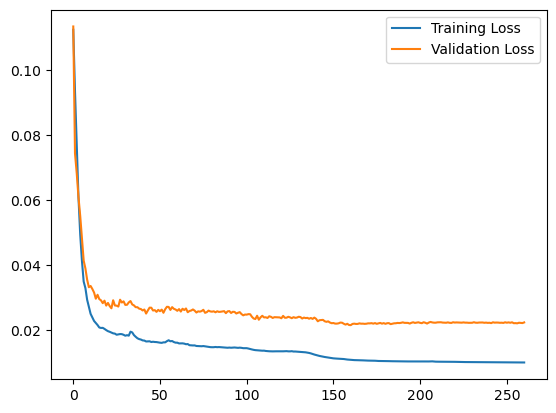

In [167]:
encoded_imgs_2 = autoencoder_2.encoder_2(Bdd_test_2).numpy()
decoded_imgs_2 = autoencoder_2.decoder_2(encoded_imgs_2).numpy()
autoencoder_2.encoder_2.summary()
autoencoder_2.decoder_2.summary()
plt.plot(history2.history["loss"], label="Training Loss")
plt.plot(history2.history["val_loss"], label="Validation Loss")
plt.legend()

In [173]:
Bdd_test_3.shape

(599, 1, 1, 2)

Visualition

In [86]:
#Generation de la base de données de toutes les intensités (sauf prediction)
#choisir le fichier (folder)
nom_fichier="hydro"
n=1000
size=128
pas=10

Test=[]



folder=2
image1=Image.open("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(1,4)+".gif").convert('RGB')
image1=image1.resize((128,128),Image.ANTIALIAS)
image1=np.array(image1)
Test.append(image1)


for j in range(2,1001,pas):
    image1=Image.open("../Datasets/"+nom_fichier+"/"+str(folder)+"/ima_"+format_number(j,4)+".gif").convert('RGB')
    image1=image1.resize((128,128),Image.ANTIALIAS)
    image1=np.array(image1)
    Test.append(image1)




print("train fait")
  


Test=np.array(Test)/255


/tmp/ipykernel_1130458/2686543014.py:12: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image1=image1.resize((128,128),Image.ANTIALIAS)
/tmp/ipykernel_1130458/2686543014.py:19: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  image1=image1.resize((128,128),Image.ANTIALIAS)


train fait


In [44]:
#Affectation des fichiers
Test0=Test

In [46]:
Test1=Test

In [48]:
Test2=Test

In [58]:
Test0=Test0/255
Test1=Test1/255
Test2=Test2/255

In [175]:
Test_decoded=autoencoder.decoder(autoencoder.encoder(Test))


Affichage de l'espace latent

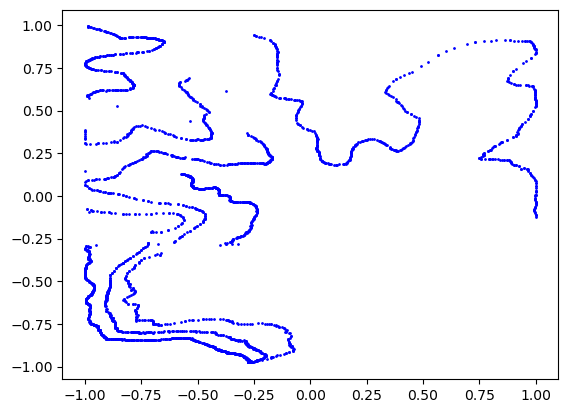

In [90]:

Bdd_test_3 = np.array(autoencoder_2.encoder_2(Bdd_test_2))
Bdd_train_3 = np.array(autoencoder_2.encoder_2(Bdd_train_2))
Test_reduced=np.array(autoencoder_2.encoder_2(autoencoder.encoder(Test0)))
Test_reduced1=np.array(autoencoder_2.encoder_2(autoencoder.encoder(Test1)))
Test_reduced2=np.array(autoencoder_2.encoder_2(autoencoder.encoder(Test2)))

Xtr=[]
Ytr=[]
Xte=[]
Yte=[]
X=[]
Y=[]
X1=[]
X2=[]
Y1=[]
Y2=[]
for i in range(len(Bdd_test)):
    x=Bdd_test_3[i,0,0,0]
    y=Bdd_test_3[i,0,0,1]
    Xte.append(x)
    Yte.append(y)
for i in range(len(Bdd_train)):
    x=Bdd_train_3[i,0,0,0]
    y=Bdd_train_3[i,0,0,1]
    Xtr.append(x)
    Ytr.append(y)

for i in range(len(Test0)):
    x=Test_reduced[i,0,0,0]
    y=Test_reduced[i,0,0,1]
    X.append(x)
    Y.append(y)

for i in range(len(Test1)):
    x=Test_reduced1[i,0,0,0]
    y=Test_reduced1[i,0,0,1]
    X1.append(x)
    Y1.append(y)

for i in range(len(Test2)):
    x=Test_reduced2[i,0,0,0]
    y=Test_reduced2[i,0,0,1]
    X2.append(x)
    Y2.append(y)

plt.scatter(Xte,Yte,color='blue',s=1)
plt.scatter(Xtr,Ytr,color='blue',s=1)
#plt.scatter(X,Y,color='green')
#plt.scatter(X1,Y1,color='yellow')
#plt.scatter(X2,Y2,color='red')



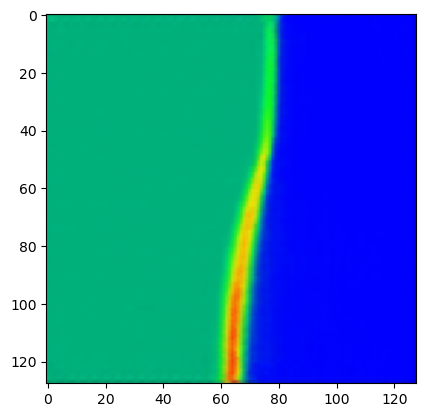

In [65]:
#Fonction qui étant donné x et y produit le vecteur latent dans l'espace et le décoder et donne l'image
def Image(x,y):
    Image=np.array([[x,y]])
    Res=autoencoder.decoder(np.array([[autoencoder_2.decoder_2(Image)]]))
    return(np.array(Res[0]))

plt.imshow(Image(0,0))

maillage espace latent

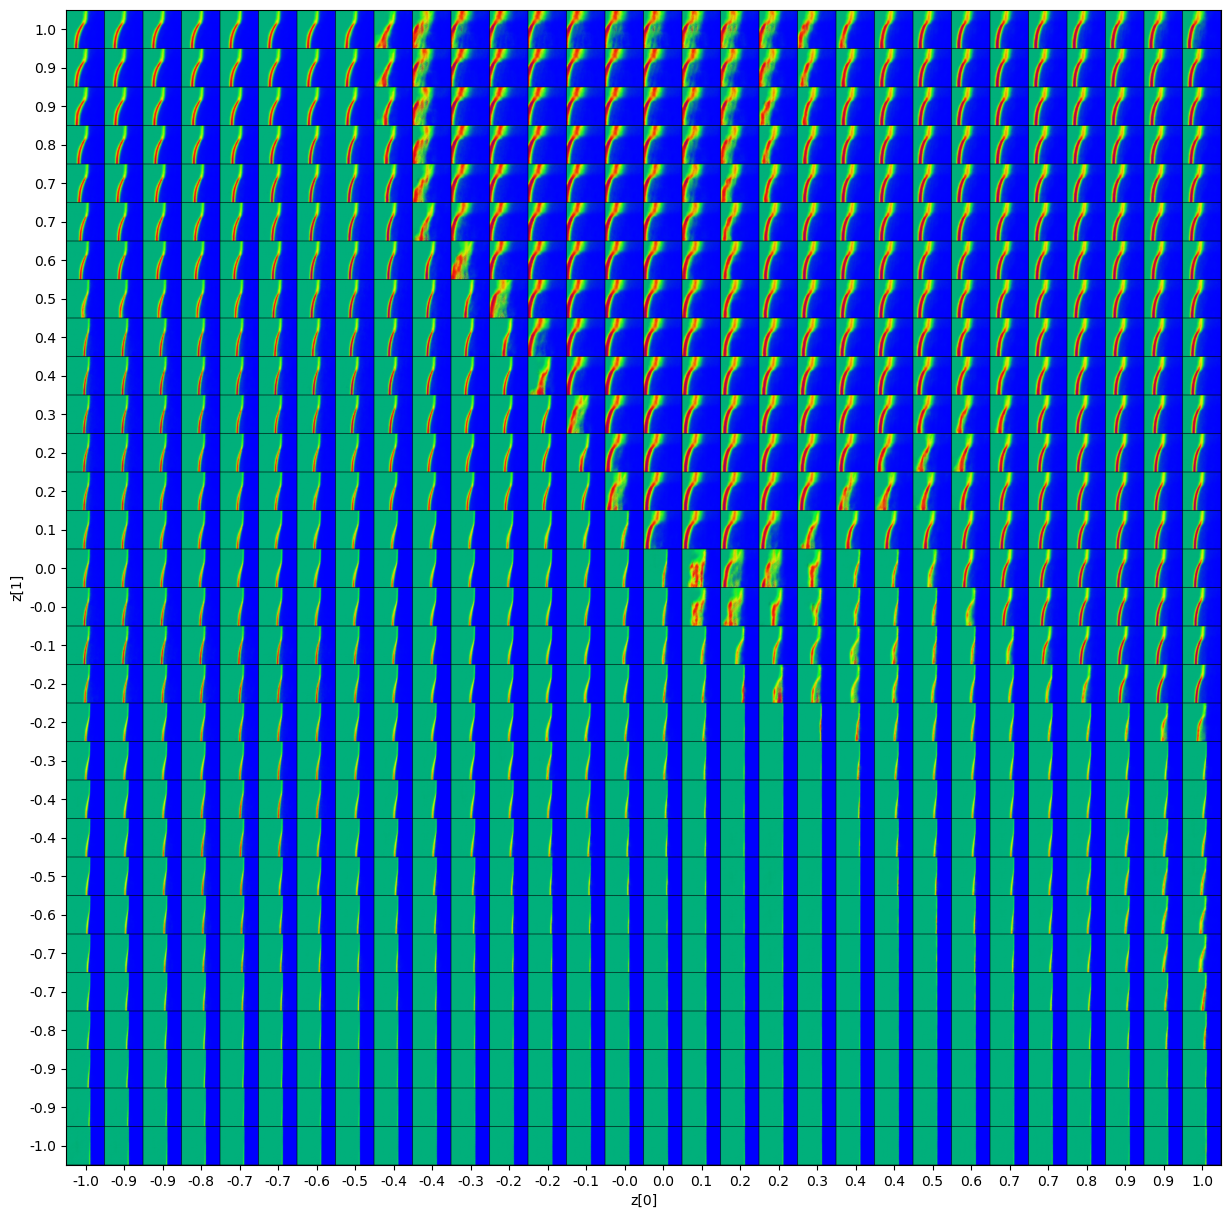

In [71]:
#Fonction pour mailler l'espace latent 

def plot_latent_space(ae, n=30, figsize=15):
    # display a n*n 2D manifold of digits
    digit_size = 128
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n,3))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-scale, scale, n)
    grid_y = np.linspace(-scale, scale, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            x_decoded=Image(xi,yi)
            digit = x_decoded
            digit[:,0,:]=0
            digit[:,digit_size-1,:]=0
            digit[0,:,:]=0
            digit[digit_size-1,:,:]=0

          
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,:
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure,cmap='inferno')
    plt.show()


plot_latent_space(autoencoder_2)

ANimation espace latent

In [87]:
#Fonction qui crée la double image Espace latent actualisé + Image correspondante du phénomène physique
#Il faut donner :
# Bdd_image : Image la simulation considérée
#Bdd Vecteur latent de la simulation considérée
#Bdd_train1 les vecteurs latents de toute la base de données train (Intensités connus)
#Bdd_test1 les vecteurs latents de toute la base de données de test (Intensités connus)
#long_terme=True *NOn disponible dans ce code* optionnel, pour afficher les predictions 
#stabilisation=True *NOn disponible dans ce code* optionnel, pour que les prédictions soient stabilisées ou non 

def create_images_parcours_AE2(Bdd,Bdd_train1,Bdd_test1,long_terme=True,stabilisation=True):
    #Créer la figure
    plt.ion
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    latent_pca_2=autoencoder_2.encoder_2(np.array(np.concatenate((Bdd_train1,Bdd_test1,Bdd),axis=0)))
    

    #axes[1].imshow(image, cmap='gray')
    Xte=[]
    Yte=[]
    X1=[]
    Y1=[]


     
    Serie=[]
    Images=np.array(autoencoder.decoder(Bdd))

    n=len(Bdd_test1)+len(Bdd_train1)
    n1=n+len(Bdd)
            

    for i in range(n):
        x=latent_pca_2[i,0,0,0]
        y=latent_pca_2[i,0,0,1]
        Xte.append(x)
        Yte.append(y)
    

    for i in range(n,n1):
        x=latent_pca_2[i,0,0,0]
        y=latent_pca_2[i,0,0,1]
        X1.append(x)
        Y1.append(y)

    axes[0].scatter(Xte,Yte,color='blue',s=1)

    image = axes[1].imshow(Images[0],cmap='gray')
    axes[1].get_xaxis().set_visible(False)
    axes[1].get_yaxis().set_visible(False)

    n=len(Bdd)

    print("Creation des images\n")
    for i in range(n-1):
        axes[0].scatter(X1[i:i+1],Y1[i:i+1],color='red')
        image.set_data(Images[i])
        fig.canvas.draw()
        fig.canvas.flush_events()
        plt.savefig("../Images/"+str(i)+".png")



    axes[0].scatter(X1[(n-1):],Y1[(n-1):],color='red',marker='x')
    image.set_data(Images[n-1])
    fig.canvas.draw()
    fig.canvas.flush_events()
    plt.savefig("../Images/"+str(n-1)+".png")


    print("Creation du gif")

    
#Creation du gif a partir de l'adresse de sauvegarde de la fonction précédente (create_image_parcours_AE2)

   
def create_gif(file,taille):
    fig=plt.figure(figsize=(20,10))
    ims=[]
    
    for i in range(0,taille):
        Pendule=mpimg.imread(file+str(i)+".png")
        plt.axis('off')
        im=plt.imshow(Pendule,animated=True,cmap='gray')
        ims.append([im])

    ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=10000)

    ani.save('latent_pred.gif')
    plt.show()
   



Creation des images

Creation du gif


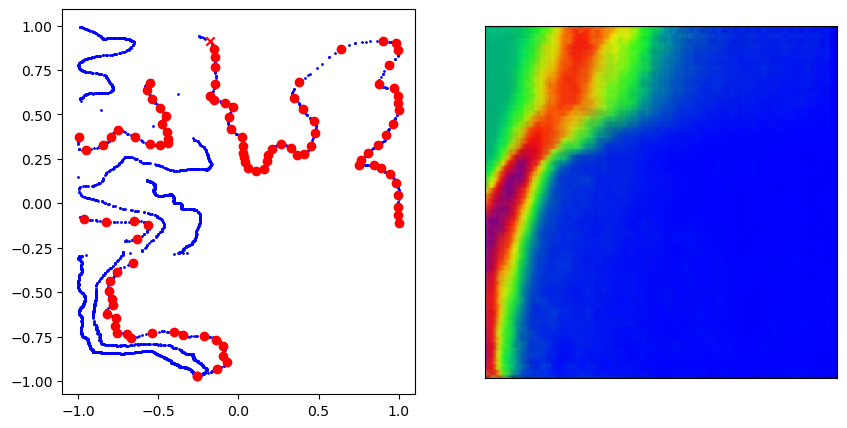

In [88]:
#Creation des images pour les animations désirées

Bdd_test_2=autoencoder.encoder(Bdd_test).numpy()
Bdd_train_2=autoencoder.encoder(Bdd_train).numpy()
Test_2=np.array(autoencoder.encoder(Test))
create_images_parcours_AE2(Test_2,Bdd_train_2,Bdd_test_2,False,False)

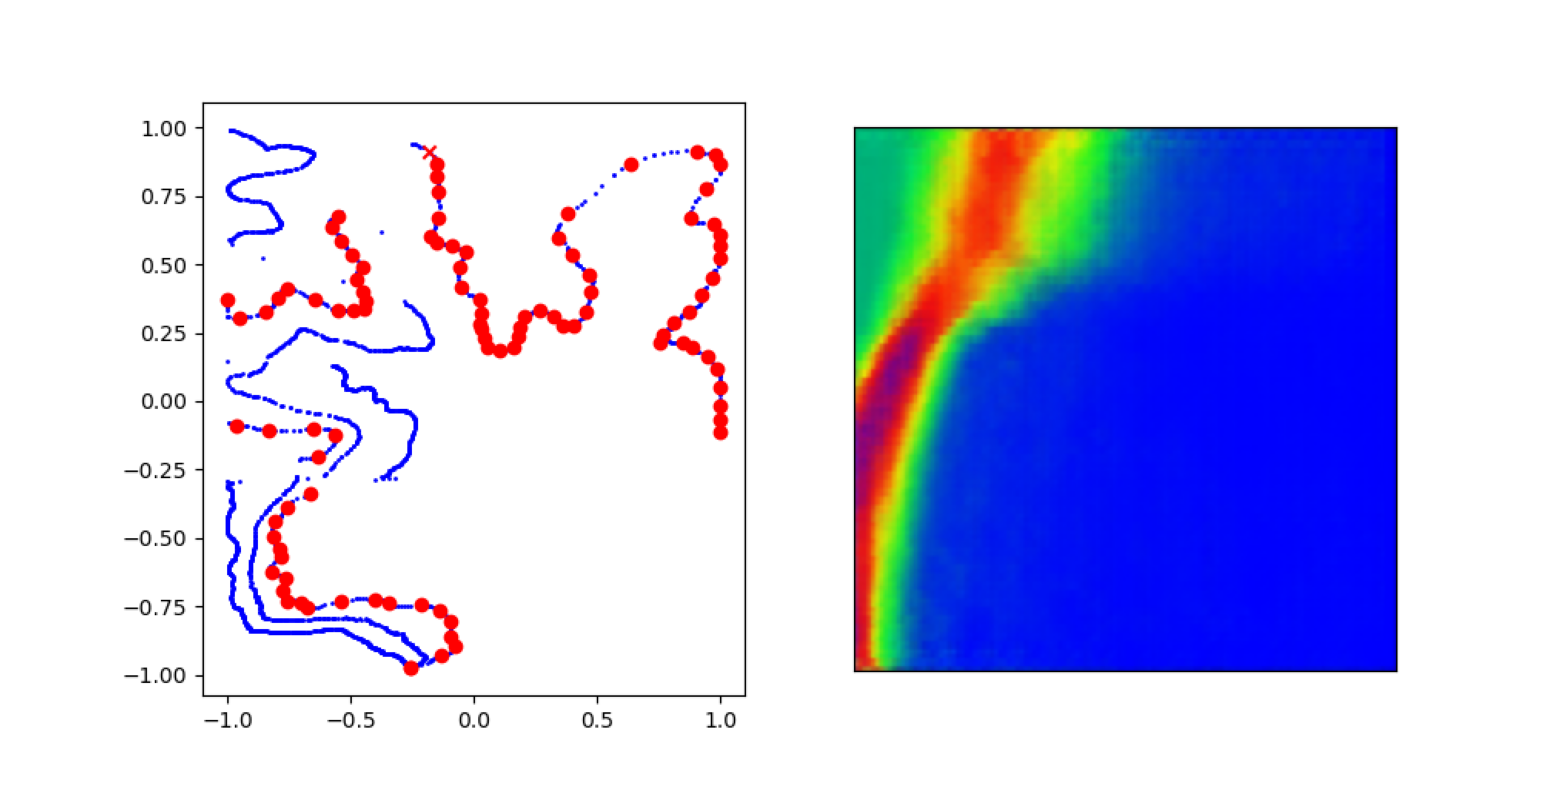

In [89]:
#creation du gif a partir des images créées
create_gif("../Images/",len(Test))